# Invasive Species Monitoring

First we need to create a directory structure and get a small sample of training and validation data.

In [46]:
import os
import numpy as np
import pandas as pd
cwd = os.getcwd()
windows=True

main_path = "data\\"
data_path ="data\\sample\\"
#data_path = "data/dogscats/"
test_path = data_path + "test\\"

In [2]:
main_path = "data/"
data_path ="data/sample/"
#data_path = "data/"
train_path = data_path + "train/"
valid_path = data_path + "valid/"
test_path = data_path + "test/"

## Make Directory structure, validation set, and small sample

In [5]:
import os
import errno

def make_sure_path_exists(path):
    try:
        os.makedirs(path)
    except OSError as exception:
        if exception.errno != errno.EEXIST:
            raise

In [43]:
#import training labels

training_labels = pd.read_csv(main_path+'train_labels.csv',index_col=0)
training_labels.head(3)
type(training_labels.index[0])

numpy.int64

In [64]:
import glob
import re
import shutil

#get image names
image_names = [filename for filename in glob.glob(main_path + 'train/*')]

#if windows replace backslashes (on linux this needs to be commented out)
image_names = list(map(lambda x: x.replace("\\","/"), image_names))

#join names with labels
pattern = re.compile("\d+")
image_ids = [pattern.search(x).group() for x in image_names if pattern.search(x) != None]
count_non_images = len([pattern.search(x) for x in image_names if pattern.search(x) == None])
image_df = pd.DataFrame({'id':image_ids,'filename':image_names[:-2]})
image_df.set_index('id',inplace=True)
image_df.index = image_df.index.astype(int)
image_df = image_df.join(training_labels,how='left')

invasive_filenames = image_df[image_df['invasive']==1]['filename']
not_invasive_filenames = image_df[image_df['invasive']==0]['filename']

invasive_filenames[:3]
for filename in invasive_filenames:
   shutil.move(filename,main_path+'train/Invasive/')
    
for filename in not_invasive_filenames:
   shutil.move(filename,main_path+'train/Not-invasive/')

2


In [86]:
#Create amended paths
invasive_filenames_m = [x.replace('train/','train/Invasive/') for x in invasive_filenames]
not_invasive_filenames_m = [x.replace('train/','train/Not-invasive/') for x in not_invasive_filenames]
#not_invasive_filenames_m[:3]

['data/train/Not-invasive/1.jpg',
 'data/train/Not-invasive/10.jpg',
 'data/train/Not-invasive/1001.jpg']

Create directory structure for validation

In [69]:
           
make_sure_path_exists(main_path+'valid/')
make_sure_path_exists(main_path+'valid/Invasive')
make_sure_path_exists(main_path+'valid/Not-invasive')

Move 10% data for validation

In [91]:
pct=0.1
move_invasive_filenames = np.random.choice(invasive_filenames_m,int(pct*len(invasive_filenames_m)),replace=False)
print("Invasive images moved to validation: " + str(len(move_invasive_filenames)))
move_not_invasive_filenames = np.random.choice(not_invasive_filenames_m,int(pct*len(not_invasive_filenames_m)),replace=False)
print("Not-invasive images moved to validation: " + str(len(move_not_invasive_filenames)))

for filename in move_invasive_filenames:
   shutil.move(filename,main_path+'valid/Invasive/')
    
for filename in move_not_invasive_filenames:
   shutil.move(filename,main_path+'valid/Not-invasive/')

Invasive images moved to validation: 144
Not-invasive images moved to validation: 84


In [95]:
#Amend validation filenames
#Create amended paths
valid_invasive_filenames_m = [x.replace('train/Invasive/','valid/Invasive/') for x in move_invasive_filenames]
valid_not_invasive_filenames_m = [x.replace('train/Not-invasive/','valid/Not-invasive/') for x in move_not_invasive_filenames]
#valid_invasive_filenames_m[:3]
#valid_not_invasive_filenames_m[:3]

['data/valid/Not-invasive/45.jpg',
 'data/valid/Not-invasive/1637.jpg',
 'data/valid/Not-invasive/291.jpg']

Copy 20% data to sample 

In [96]:
make_sure_path_exists(main_path+'sample/valid/')
make_sure_path_exists(main_path+'sample/valid/Invasive')
make_sure_path_exists(main_path+'sample/valid/Not-invasive')
make_sure_path_exists(main_path+'sample/train/')
make_sure_path_exists(main_path+'sample/train/Invasive')
make_sure_path_exists(main_path+'sample/train/Not-invasive')
make_sure_path_exists(main_path+'sample/test/Unknown')

In [98]:
def copy_files_to_sample(prefix,suffix,pct=0.1,windows=False):
    image_names = [filename for filename in glob.glob(main_path + prefix + suffix + '*')]
    #if windows replace backslashes (on linux this needs to be commented out)
    if (windows):
        image_names = list(map(lambda x: x.replace("\\","/"), image_names))

    copy_image_names = np.random.choice(image_names,int(pct*len(image_names)),replace=False)
    print(prefix + ", " + suffix + " images copied: " + str(len(copy_image_names)))
        
    for filename in copy_image_names:
       shutil.copy(filename,main_path+'sample/' + prefix + suffix)

In [97]:
pct=0.2
windows=True

In [99]:
#get training Invasive image names
copy_files_to_sample('train/','Invasive/',pct=pct,windows=windows)
copy_files_to_sample('train/','Not-invasive/',pct=pct,windows=windows)
copy_files_to_sample('valid/','Invasive/',pct=pct,windows=windows)
copy_files_to_sample('valid/','Not-invasive/',pct=pct,windows=windows)
copy_files_to_sample('test/','Unknown/',pct=pct,windows=windows)


train/, Invasive/ images copied: 260
train/, Not-invasive/ images copied: 152
valid/, Invasive/ images copied: 28
valid/, Not-invasive/ images copied: 16
test/, Unknown/ images copied: 306


## Load utils and initialize custom Tensorflow session for Keras

In [3]:
%matplotlib inline
from imp import reload
import utils; reload(utils)
from utils import *

Using TensorFlow backend.


In [4]:
!nvidia-smi

Thu Aug 17 05:32:30 2017       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 367.48                 Driver Version: 367.48                    |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | E486:00:00.0     Off |                    0 |
| N/A   40C    P0    71W / 149W |     64MiB / 11439MiB |      1%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [6]:
batch_size=4
make_sure_path_exists(main_path+'results/')

# Finetune and train

In [12]:
import vgg16; reload(vgg16)
from vgg16 import Vgg16

In [13]:
vgg = Vgg16()

L:\Data Science\GIT\Invasive-Species-Monitoring\vgg16.py:105: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  model.add(Convolution2D(filters, 3, 3, activation='relu'))
L:\Data Science\GIT\Invasive-Species-Monitoring\vgg16.py:105: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), activation="relu")`
  model.add(Convolution2D(filters, 3, 3, activation='relu'))
L:\Data Science\GIT\Invasive-Species-Monitoring\vgg16.py:105: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(256, (3, 3), activation="relu")`
  model.add(Convolution2D(filters, 3, 3, activation='relu'))
L:\Data Science\GIT\Invasive-Species-Monitoring\vgg16.py:105: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(512, (3, 3), activation="relu")`
  model.add(Convolution2D(filters, 3, 3, activation='relu'))


In [22]:
batches = vgg.get_batches(data_path+'train',batch_size=batch_size)
val_batches = vgg.get_batches(data_path+'valid', batch_size=batch_size)
vgg.finetune(batches)

Found 412 images belonging to 2 classes.
Found 44 images belonging to 2 classes.


vgg.model.load_weights(main_path+'results/ft01.h5')

## Visualize a few images

In [61]:
def plot_idx(path,idx, titles=None,rows=1):
    step = len(idx) // rows
    start=0
    end=step
    for i in range(rows):
        plots([image.load_img(path + i) for i in idx[start:end]], titles=titles[start:end])
        start += step
        end += step

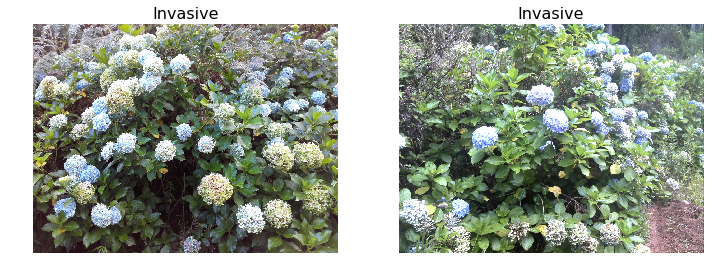

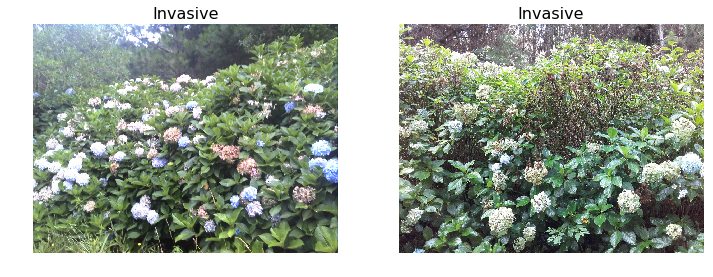

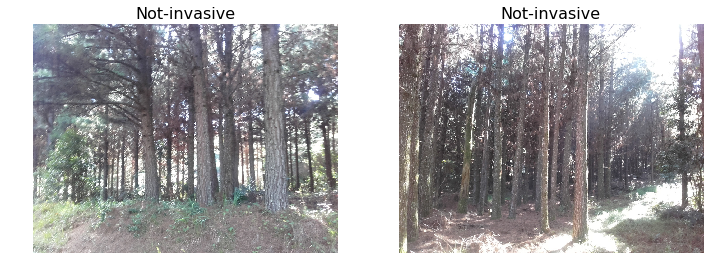

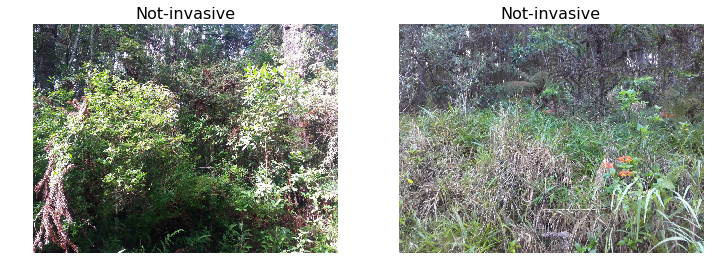

In [63]:

n_view = 4
t_filenames = batches.filenames
t_labels = batches.classes
t_df = pd.DataFrame({'label':t_labels,'filename':t_filenames})
t_df['label'] = t_df['label'].map({0:'Invasive',1:'Not-invasive'})
if (windows):
    t_df['filename'] = t_df['filename'].apply(lambda x: x.replace("\\","/"))
t_invasive = t_df[t_df['label']=='Invasive']
t_not_invasive = t_df[t_df['label']=='Not-invasive']
t_invasive_to_plot = t_invasive.sample(n_view,replace=False)
t_not_invasive_to_plot = t_not_invasive.sample(n_view,replace=False)

plot_idx(train_path,list(t_invasive_to_plot['filename']),list(t_invasive_to_plot['label']),rows=2)
plot_idx(train_path,list(t_not_invasive_to_plot['filename']),list(t_not_invasive_to_plot['label']),rows=2)


In [108]:
batches_per_epoch_div = 1
epochs_to_run=1

In [109]:
vgg.model.optimizer.lr=0.001
vgg.fit(batches,val_batches,nb_epoch=epochs_to_run,steps_per_epoch=(batches.samples // batch_size) // batches_per_epoch_div, validation_steps=val_batches.samples // batch_size)

L:\Data Science\GIT\Invasive-Species-Monitoring\vgg16.py:218: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  validation_data=val_batches, validation_steps=validation_steps)
L:\Data Science\GIT\Invasive-Species-Monitoring\vgg16.py:218: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras.pre..., validation_steps=11, steps_per_epoch=103, epochs=1, validation_data=<keras.pre...)`
  validation_data=val_batches, validation_steps=validation_steps)


Epoch 1/1
103/103 [==============================] - 29s - loss: 0.7175 - acc: 0.7597 - val_loss: 0.6446 - val_acc: 0.7955


The computation is run on NVIDIA Tesla K80 with around 11GB RAM. As seen below Tensorflow session keeps the memory allocation.

In [11]:
!nvidia-smi

Thu Aug 17 05:41:14 2017       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 367.48                 Driver Version: 367.48                    |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | E486:00:00.0     Off |                    0 |
| N/A   67C    P0    76W / 149W |   9477MiB / 11439MiB |    100%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [112]:
vgg.model.save_weights(main_path+'results/ft01.h5')

In [137]:
vgg.model.optimizer.lr=0.0003
vgg.fit(batches,val_batches,nb_epoch=epochs_to_run,steps_per_epoch=(batches.samples // batch_size) // batches_per_epoch_div, validation_steps=val_batches.samples // batch_size)
vgg.model.save_weights(main_path+'results/ft02.h5')

L:\Data Science\GIT\Invasive-Species-Monitoring\vgg16.py:218: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  validation_data=val_batches, validation_steps=validation_steps)
L:\Data Science\GIT\Invasive-Species-Monitoring\vgg16.py:218: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras.pre..., validation_steps=11, steps_per_epoch=103, epochs=1, validation_data=<keras.pre...)`
  validation_data=val_batches, validation_steps=validation_steps)


Epoch 1/1
103/103 [==============================] - 27s - loss: 0.4881 - acc: 0.8301 - val_loss: 0.9108 - val_acc: 0.7045


In [139]:
vgg.model.optimizer.lr = 0.0001

In [140]:
vgg.fit(batches,val_batches,nb_epoch=epochs_to_run,steps_per_epoch=(batches.samples // batch_size) // batches_per_epoch_div, validation_steps=val_batches.samples // batch_size)
vgg.model.save_weights(main_path+'results/ft03.h5')

L:\Data Science\GIT\Invasive-Species-Monitoring\vgg16.py:218: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  validation_data=val_batches, validation_steps=validation_steps)
L:\Data Science\GIT\Invasive-Species-Monitoring\vgg16.py:218: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras.pre..., validation_steps=11, steps_per_epoch=103, epochs=1, validation_data=<keras.pre...)`
  validation_data=val_batches, validation_steps=validation_steps)


Epoch 1/1
103/103 [==============================] - 27s - loss: 0.3849 - acc: 0.8859 - val_loss: 0.9568 - val_acc: 0.7955


In [ ]:
vgg.model.optimizer.lr = 0.00003
vgg.fit(batches,val_batches,nb_epoch=epochs_to_run,steps_per_epoch=(batches.samples // batch_size) // batches_per_epoch_div, validation_steps=val_batches.samples // batch_size)
vgg.model.save_weights(main_path+'results/ft04.h5')

In [ ]:
vgg.model.optimizer.lr = 0.000001
vgg.fit(batches,val_batches,nb_epoch=epochs_to_run,steps_per_epoch=(batches.samples // batch_size) // batches_per_epoch_div, validation_steps=val_batches.samples // batch_size)
vgg.model.save_weights(main_path+'results/ft05.h5')

#Windows version
vgg.model.load_weights(main_path+'results\\ft05.h5')

In [15]:
vgg.model.load_weights(main_path+'results/ft03.h5')

Score using roc_auc_score

In [170]:
from sklearn.metrics import roc_auc_score
val_batches2 = vgg.get_batches(valid_path,shuffle=False,batch_size=batch_size,class_mode=None)
val_probs = vgg.model.predict_generator(val_batches2,steps = val_batches2.samples // batch_size, verbose=1)
val_labels = val_batches2.classes
val_preds = np.round(val_probs[:,1])
roc_auc = roc_auc_score(val_labels,val_probs[:,1])
print("ROC AUC score on validation data: " + str(roc_auc))

Found 44 images belonging to 2 classes.
11/11 [==============================] - 2s     
ROC AUC score on validation data: 0.904017857143


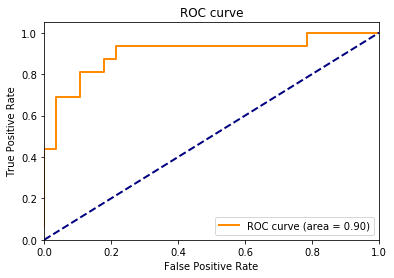

In [178]:
from sklearn.metrics import roc_curve
fpr,tpr, tr = roc_curve(val_labels,val_probs[:,1])
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

In [179]:
s_ids = np.random.choice((range(len(val_probs))),5,replace=False)
print(val_probs[s_ids].round(2))
print(val_labels[s_ids])

[[ 0.45  0.55]
 [ 1.    0.  ]
 [ 1.    0.  ]
 [ 0.02  0.98]
 [ 1.    0.  ]]
[1 0 0 1 0]


[[27  1]
 [ 6 10]]


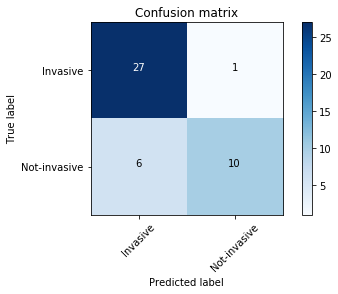

In [180]:
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(val_labels,val_preds)
plot_confusion_matrix(cm, val_batches2.class_indices)

In [181]:
from sklearn.metrics import classification_report
print(classification_report(val_labels,val_preds))

             precision    recall  f1-score   support

          0       0.82      0.96      0.89        28
          1       0.91      0.62      0.74        16

avg / total       0.85      0.84      0.83        44



## Run predictions on the test and generate submission

In [75]:
test_batch_size=3
test_batches = vgg.get_batches(test_path,shuffle=False,batch_size=test_batch_size,class_mode=None)
print(test_batches.samples)

Found 306 images belonging to 1 classes.
306


In [76]:
prediction = vgg.model.predict_generator(test_batches, steps = test_batches.samples // (test_batch_size), verbose=1)

102/102 [==============================] - 19s    


In [77]:
filenames = test_batches.filenames
print(len(filenames))

306


In [78]:
print(prediction.shape)
print(prediction[:5])
prediction_trim = prediction[:len(filenames)]
print(prediction_trim.shape)

(306, 2)
[[ 0.1876  0.8124]
 [ 0.2876  0.7124]
 [ 0.165   0.835 ]
 [ 0.1558  0.8442]
 [ 0.1967  0.8033]]
(306, 2)


In [79]:
prediction_clip = prediction
#prediction_clip = np.clip(prediction_trim,0.02,0.98)
#prediction_clip[:5]

In [82]:
if (windows):
    filenames = [x.replace("\\","/") for x in filenames]
filenames[:5]

['Unknown/1007.jpg',
 'Unknown/1008.jpg',
 'Unknown/102.jpg',
 'Unknown/1022.jpg',
 'Unknown/1027.jpg']

In [ ]:
#Windows version
#from PIL import Image
#Image.open(test_path.replace("/","\\")+filenames[0])

In [83]:
from PIL import Image
#print(prediction[0])
print(filenames[0])
Image.open(test_path+filenames[0])

Unknown/1007.jpg


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


In [84]:
isinvasive = prediction_clip[:,1]
isinvasive[:5]

array([ 0.8124,  0.7124,  0.835 ,  0.8442,  0.8033], dtype=float32)

In [85]:
import re
pattern = re.compile('\d+')
ids = [pattern.search(x).group() for x in filenames]
ids[-5:]


['983', '984', '989', '996', '997']

In [86]:
print(len(ids))
print(len(isinvasive))

306
306


## Show some predictions

         label
id            
1007  0.812416
1008  0.712416
102   0.834986
1022  0.844214
1027  0.803330


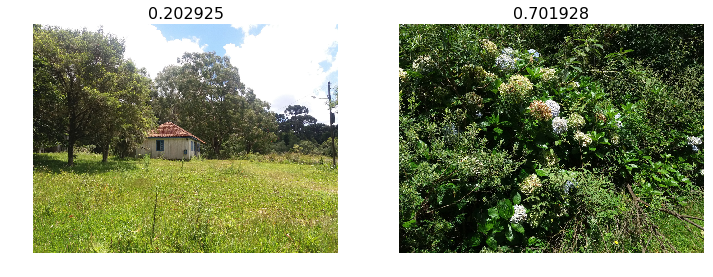

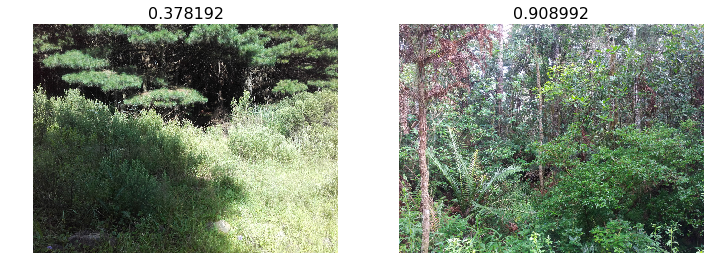

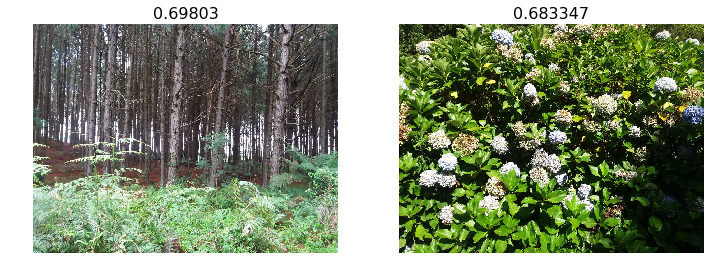

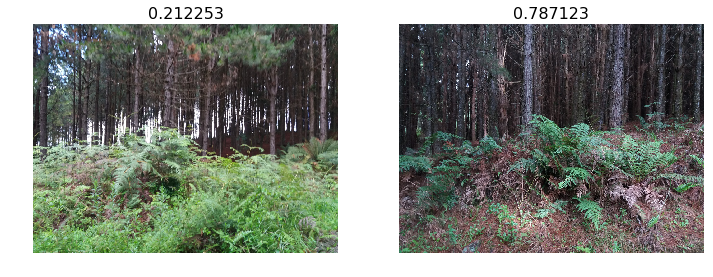

In [87]:
n_view=8

df = pd.DataFrame({'id':ids,'label':isinvasive})
df['id'] = df['id'].astype(int)
df = df.set_index('id')
print(df.head())
f_names = permutation(filenames)[:n_view]
idx = [pattern.search(x).group() for x in f_names]
plot_idx(test_path,f_names,list(df.loc[np.array(idx).astype(int),'label']),rows=4)


In [ ]:
type(df.index[0])

In [94]:
import pandas as pd
subm_df = pd.DataFrame({'name':ids,'invasive':isinvasive})
subm_df = subm_df.reindex_axis(['name','invasive'], axis=1)
subm_df.head()

name  invasive
0  1007  0.812416
1  1008  0.712416
2   102  0.834986
3  1022  0.844214
4  1027  0.803330

In [95]:
subm_df.tail()

name  invasive
301  983  0.945658
302  984  0.658526
303  989  0.713674
304  996  0.787123
305  997  0.722742

In [96]:
subm_df['name'] = subm_df['name'].astype(int)
print(subm_df.info())
print(subm_df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 2 columns):
name        306 non-null int32
invasive    306 non-null float32
dtypes: float32(1), int32(1)
memory usage: 2.5 KB
None
   name  invasive
0  1007  0.812416
1  1008  0.712416
2   102  0.834986
3  1022  0.844214
4  1027  0.803330


In [98]:
subm_num = '001'
subm_df.to_csv(main_path + 'results/' + 'subm' + subm_num+ '.csv',index=False, float_format='%.5f')

In [99]:
from IPython.display import FileLink
FileLink(main_path + 'results/' + 'subm' + subm_num+ '.csv')

L:\Data Science\GIT\Invasive-Species-Monitoring\data\results\subm001.csv

In [100]:
#Read submission if needed
subm_num = '001'
subm_df = pd.read_csv(main_path + 'results/' + 'subm' + subm_num+ '.csv')
print(subm_df.info())
subm_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 2 columns):
name        306 non-null int64
invasive    306 non-null float64
dtypes: float64(1), int64(1)
memory usage: 4.9 KB
None


name  invasive
0  1007   0.81242
1  1008   0.71242
2   102   0.83499
3  1022   0.84421
4  1027   0.80333

# Visualize results

In [101]:
vgg.model.load_weights(main_path+'results/ft03.h5')
batch_size=4
val_batches2 = vgg.get_batches(data_path+'valid', shuffle=False, batch_size=batch_size, class_mode=None)
val_probs = vgg.model.predict_generator(val_batches2, steps = val_batches2.samples // (batch_size),verbose=1)

Found 44 images belonging to 2 classes.
11/11 [==============================] - 2s     


In [120]:
val_labels = val_batches2.classes
val_filenames = val_batches2.filenames
if (windows):
    val_filenames = [x.replace("\\","/") for x in val_filenames]
val_filenames[:5]

['Invasive/1063.jpg',
 'Invasive/1151.jpg',
 'Invasive/1204.jpg',
 'Invasive/1243.jpg',
 'Invasive/1248.jpg']

In [131]:
val_isInvasive_probs = val_probs[:,1]
val_preds = np.round(val_isInvasive_probs)
val_isInvasive_probs[:5]

array([  2.3884e-07,   9.9564e-04,   2.3135e-05,   2.4378e-01,   5.6235e-02], dtype=float32)

In [132]:
val_preds[:5]

array([ 0.,  0.,  0.,  0.,  0.], dtype=float32)

In [133]:
#Number of images to check
n_view = 4

Plot correct predictions of not invasive images

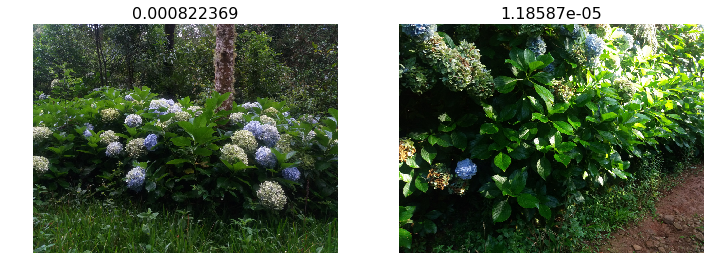

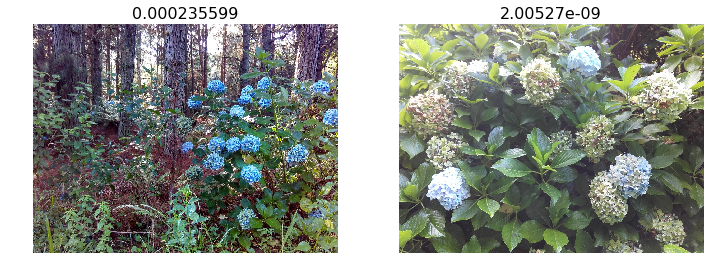

In [138]:
correct = np.where(val_preds == val_labels)[0]
idx = permutation(correct)[:n_view]
plot_idx(valid_path,np.array(val_filenames)[idx],val_isInvasive_probs[idx],rows=2)

Plot a few incorrect predictions

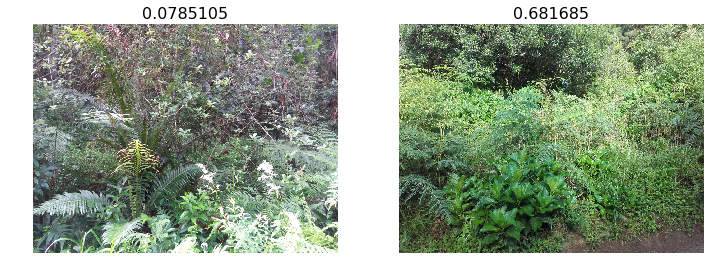

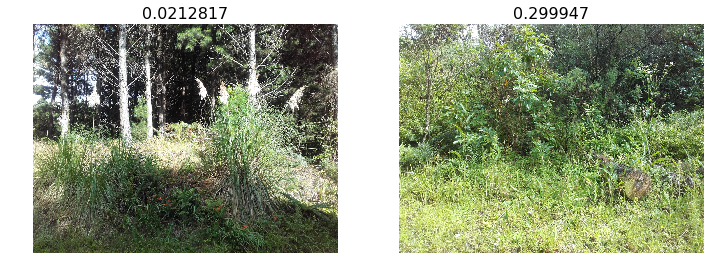

In [137]:
incorrect = np.where(val_preds != val_labels)[0]
idx = permutation(incorrect)[:n_view]
plot_idx(valid_path,np.array(val_filenames)[idx],val_isInvasive_probs[idx],rows=2)

Plot confident predictions for invasive

In [ ]:
correct_cats = np.where((val_preds==0) & (val_preds==val_labels))[0]
most_correct_cats = np.argsort(val_isCat_probs[correct_cats])[-n_view:]
plot_idx(correct_cats[most_correct_cats], val_isCat_probs[correct_cats][most_correct_cats])

Plot confident predictions for not-invasive

In [ ]:
correct_dogs = np.where((val_preds==1) & (val_preds==val_labels))[0]
most_correct_dogs = np.argsort(val_isCat_probs[correct_dogs])[:n_view]
plot_idx(correct_dogs[most_correct_dogs], val_isCat_probs[correct_dogs][most_correct_dogs])

Plot incorrectly predicted invasive

In [ ]:
incorrect_cats = np.where((val_preds==0) & (val_preds != val_labels))[0]
most_incorrect_cats = np.argsort(val_isCat_probs[incorrect_cats])[::-1][:n_view]
plot_idx(incorrect_cats[most_incorrect_cats], val_isCat_probs[incorrect_cats][most_incorrect_cats])

Plot incorrectly predicted not-invasive

In [ ]:
incorrect_dogs = np.where((val_preds==1) & (val_preds != val_labels))[0]
most_incorrect_dogs = np.argsort(val_isCat_probs[incorrect_dogs])[::-1][:n_view]
plot_idx(incorrect_dogs[most_incorrect_dogs], val_isCat_probs[incorrect_dogs][most_incorrect_dogs])

Plot the most uncertain predictions

In [ ]:
most_uncertain = np.argsort(np.abs(val_isCat_probs-0.5))
plot_idx(most_uncertain[:n_view], val_isCat_probs[most_uncertain][:n_view])

[[27  1]
 [ 6 10]]


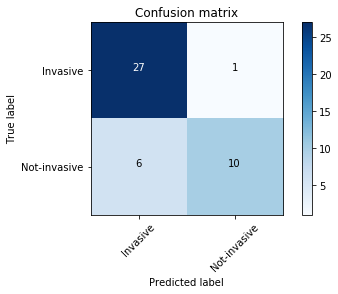

In [157]:
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(val_labels,val_preds)
plot_confusion_matrix(cm, val_batches2.class_indices)

In [158]:
from sklearn.metrics import classification_report
print(classification_report(val_labels,val_preds))

             precision    recall  f1-score   support

          0       0.82      0.96      0.89        28
          1       0.91      0.62      0.74        16

avg / total       0.85      0.84      0.83        44

